# 과제 11-5장 안면인식 파이프라인

p453 참고

1. sklearn 의 fetch_lfw_people 를 이용하여 와일드 데이터셋을 로드하세요. (옵션: min_faces_per_person=60)

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [3]:
dir(faces)

['DESCR', 'data', 'images', 'target', 'target_names']

In [30]:
import numpy as np
unique_values, counts = np.unique(faces.target, return_counts=True)

for val, freq in zip(faces.target_names, counts):
  print(val, ' : ', freq)

Ariel Sharon  :  77
Colin Powell  :  236
Donald Rumsfeld  :  121
George W Bush  :  530
Gerhard Schroeder  :  109
Hugo Chavez  :  71
Junichiro Koizumi  :  60
Tony Blair  :  144


2. 로드한 데이터셋에서 이미지 데이터를 한개 혹은 여러 개를 화면에 표시해 보세요. (plt.imshow 사용)

In [4]:
import matplotlib.pyplot as plt

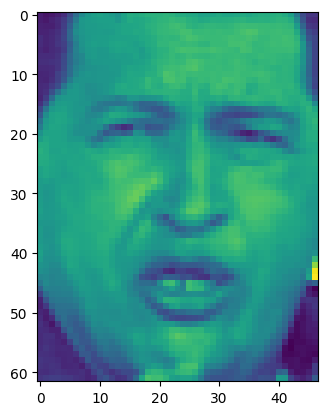

In [5]:
plt.imshow(faces.images[1347]);

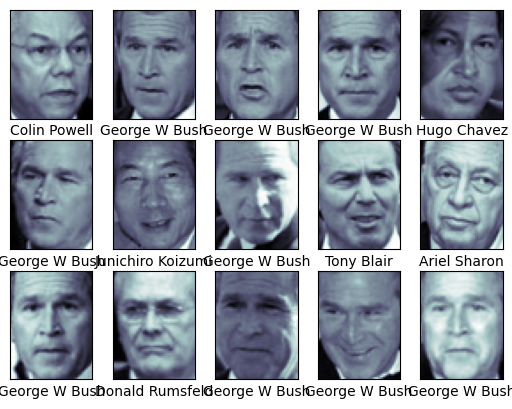

In [6]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

3. p454 참고하여 PCA 를 적용하여 150개의 핵심 특징을 추출하세요.
4. 사진 데이터를 읽어 누구인지 식별하는 모델을 만들기 위해 RandomForestClassifier 를 생성하세요.
5. PCA 와 RandomForestClassifier 를 파이프라인으로 연결하세요. (make_pipeline)

In [7]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
rfc = RandomForestClassifier()
model = make_pipeline(pca, rfc)

6. 파이프라인과 로드한 데이터셋을 이용하여 모델을 학습하세요. (fit)
7. 데이터셋과 모델을 이용하여 사람을 식별해 보세요 (predict)

In [8]:
model.fit(faces.data, faces.target)
predicted = model.predict(faces.data)
predicted.shape

(1348,)

8. accuracy_score 를 이용하여 모델의 정확도를 평가해 보세요.

In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(faces.target, predicted)

1.0

9. 만약 정확도가 1이 나왔다면, 과적합 상태이므로 이를 해결하기 위해 학습에 전체 데이터 중 일부 데이터(75%) 만 훈련 데이터로 사용하여 모델을 학습하세요 (train_test_split)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, stratify=faces.target)
model.fit(X_train, y_train)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1011, 2914), (337, 2914), (1011,), (337,))

10. 새롭게 학습한 모델을 훈련 데이터에 포함되지 않은 테스트 데이터로 사람을 식별해 보세요.

In [33]:
train_pred = model.predict(X_test)
train_pred.shape

(337,)

11. 새롭게 학습한 모델의 정확도를 평가해 보세요.

In [34]:
accuracy_score(y_test, train_pred)

0.5252225519287834

12. 다양한 평가 지표로 모델의 성능을 평가해 보세요. (classification_report, confusion_matrix, ConfusionMatrixDisplay 등)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, train_pred,
                            target_names=faces.target_names, zero_division=0))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        19
     Colin Powell       0.79      0.53      0.63        59
  Donald Rumsfeld       0.00      0.00      0.00        30
    George W Bush       0.47      1.00      0.64       133
Gerhard Schroeder       1.00      0.07      0.14        27
      Hugo Chavez       0.00      0.00      0.00        18
Junichiro Koizumi       1.00      0.27      0.42        15
       Tony Blair       0.78      0.19      0.31        36

         accuracy                           0.53       337
        macro avg       0.51      0.26      0.27       337
     weighted avg       0.53      0.53      0.43       337



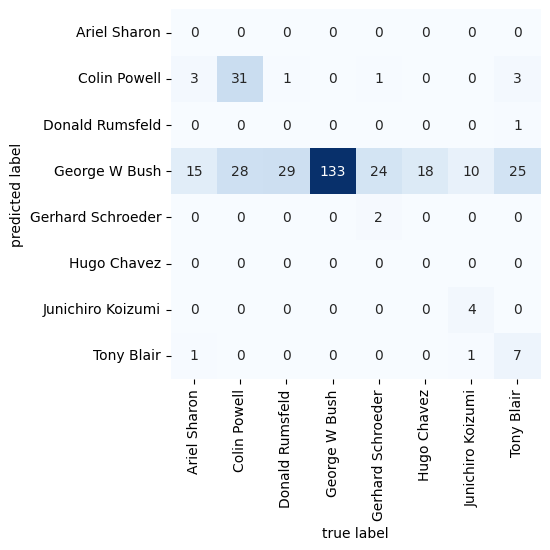

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, train_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

13. 모델의 성능을 더 높이기 위해 다음의 하이퍼파라미터를 이용하여 최적의 모델을 찾습니다. (GridSearchCV) p.455
```
hyper_params = {
    'randomforestclassifier__n_estimators': [100, 200], # num of tree
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [5, 10],
    'randomforestclassifier__max_features': ['sqrt', None]
}

In [41]:
from sklearn.model_selection import GridSearchCV
hyper_params = {
    'randomforestclassifier__n_estimators': [100, 200], # num of tree
    'randomforestclassifier__max_depth': [None, 10, 20],
    'randomforestclassifier__min_samples_split': [5, 10],
    'randomforestclassifier__max_features': ['sqrt', None]
}
grid = GridSearchCV(model, hyper_params)
%time grid.fit(X_train, y_train)
print(grid.best_params_)

CPU times: total: 12min 5s
Wall time: 11min 30s
{'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': None, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 100}


In [42]:
best_rfc = RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=10, n_estimators=100)
ppline = make_pipeline(pca, best_rfc)
ppline.fit(X_train, y_train)
best_pred = ppline.predict(X_test)
best_pred.shape

(337,)

In [43]:
accuracy_score(y_test, best_pred)

0.6201780415430267

In [44]:
print(classification_report(y_test, best_pred,
                            target_names=faces.target_names, zero_division=0))

                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        19
     Colin Powell       0.72      0.64      0.68        59
  Donald Rumsfeld       0.64      0.30      0.41        30
    George W Bush       0.58      0.96      0.73       133
Gerhard Schroeder       0.75      0.33      0.46        27
      Hugo Chavez       0.67      0.11      0.19        18
Junichiro Koizumi       0.91      0.67      0.77        15
       Tony Blair       0.54      0.36      0.43        36

         accuracy                           0.62       337
        macro avg       0.60      0.42      0.46       337
     weighted avg       0.61      0.62      0.57       337



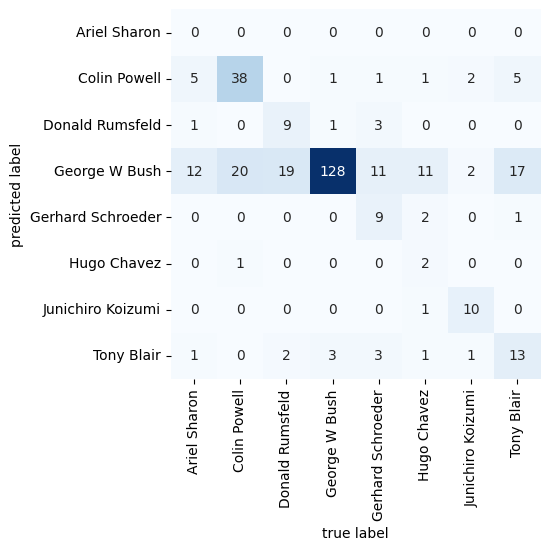

In [45]:
mat = confusion_matrix(y_test, best_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');